In [1]:

from PIL import Image
from font_diffuser.args import SampleArgs
from font_diffuser.sample import load_fontdiffuer_pipeline, sampling

pygame 2.5.2 (SDL 2.28.2, Python 3.10.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class ImageConcat:
    def __init__(self, n_h, n_v, resolution=96):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("RGB", (self.n_h*self.r, self.n_v*self.r))
        self.cursor = [0,0]
        
    def move_cursor_h(self):
        self.cursor[0] += self.r
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, im):
        self.img.paste(im, tuple(self.cursor))
        
    def save_img(self, path):
        self.img.save(path)

In [3]:
args = SampleArgs()

In [4]:
r = 96

In [5]:
content_is = range(0,11172,1100)

append 순서:
1. 굴림체 이미지 (컨텐츠)
2. 아티스트 손글씨 이미지 (스타일)
3. 아티스트 타겟 이미지 (타겟) or 더미이미지
4~. 모델 아웃풋


In [8]:
bigimg = ImageConcat(n_h=(len(content_is)+1), n_v=3+4, resolution=r)
style = "twice momo_6"
style_i = 300

bigimg.append_img(Image.open("data/f40219/content.png").convert('RGB'))
for i in content_is:
    bigimg.move_cursor_h()
    bigimg.append_img(Image.open("data/r40202/pngs/gulim__%s.png"%str(i)).convert('RGB'))
bigimg.reset_cursor_h()
bigimg.move_cursor_v()

bigimg.append_img(Image.open("data/f40219/style.png").convert('RGB'))
for i in content_is:
    bigimg.move_cursor_h()
    bigimg.append_img(Image.open("data/r40202/pngs/%s__%s.png"%(str(style), str(style_i))).convert('RGB'))
bigimg.reset_cursor_h()
bigimg.move_cursor_v()
                      
bigimg.append_img(Image.open("data/f40219/target.png").convert('RGB'))
for i in content_is:
    bigimg.move_cursor_h()
    bigimg.append_img(Image.open("data/r40202/pngs/%s__%s.png"%(str(style), str(i))).convert('RGB'))
bigimg.reset_cursor_h()
bigimg.move_cursor_v()
    
for mi in [0,1,2,3]:
    pipe = load_fontdiffuer_pipeline(args=args,model_i=mi*10000)
    bigimg.append_img(Image.open("data/f40219/phase1_ep%s.png"%str(mi)).convert('RGB'))
    for ci in content_is:
        content_image = Image.open("data/r40202/pngs/gulim__%s.png"%str(ci)).convert('RGB')
        style_image = Image.open("data/r40202/pngs/%s__%s.png"%(str(style), str(style_i))).convert('RGB')
        out_image = sampling(
            args=args, 
            pipe=pipe, 
            content_image=content_image,
            style_image=style_image,
        )
        bigimg.move_cursor_h()
        bigimg.append_img(out_image)
    bigimg.reset_cursor_h()
    bigimg.move_cursor_v()

Load the down block  DownBlock2D
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  MCADownBlock2D
The style_attention cross attention dim in Down Block 1 layer is 1024
The style_attention cross attention dim in Down Block 2 layer is 1024
Load the down block  DownBlock2D
Load the up block  UpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  StyleRSIUpBlock2D
Load the up block  UpBlock2D
Param count for Ds initialized parameters: 20591296
Get CG-GAN Style Encoder!
Param count for Ds initialized parameters: 1187008
Get CG-GAN Content Encoder!
Loaded the model state_dict successfully!
Loaded training DDPM scheduler sucessfully!
Loaded dpm_solver pipeline sucessfully!
Sampling by DPM-Solver++ ......
Saving the image ......
Finish the sampling process, costing time 3.1808247566223145s
Sampling by DPM-Solver++ ......
Saving the image 

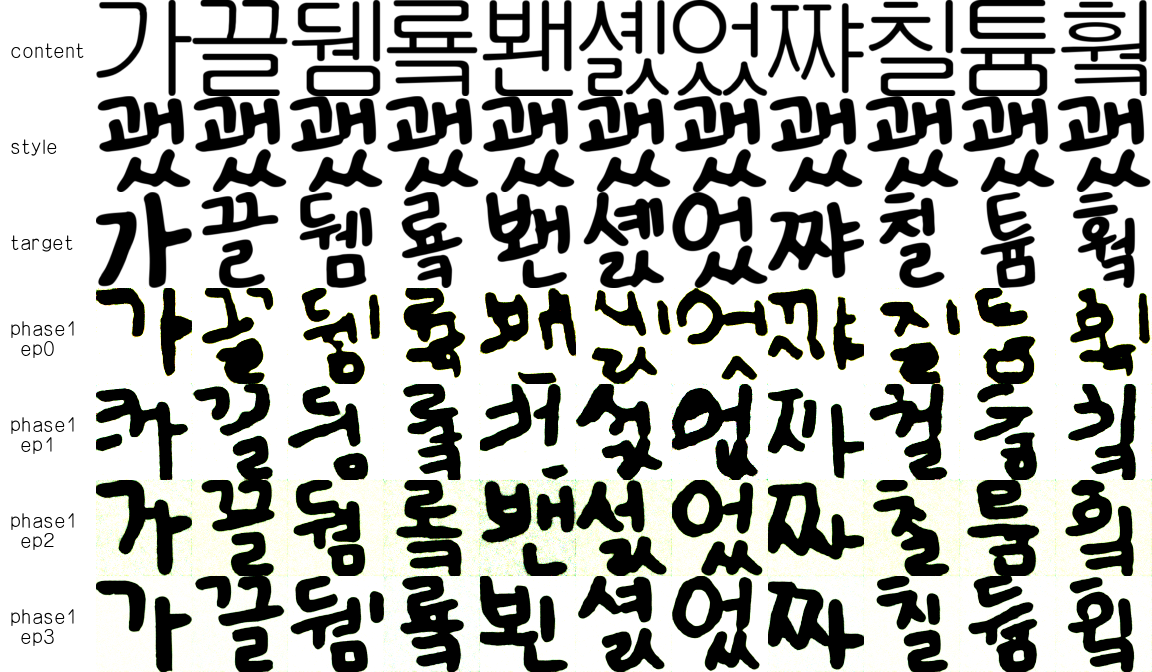

In [9]:
bigimg.img

In [14]:
pipe = load_fontdiffuer_pipeline(args=args,model_i)

content_image = Image.open("data/r40202/pngs/gulim__2000.png").convert('RGB')
style_image = Image.open("data/r40202/pngs/").convert('RGB')
out_image = sampling(
    args=args, 
    pipe=pipe, 
    content_image=Image.open("data/r40202/pngs/gulim__2000.png").convert('RGB'),
    style_image=Image.open(args.style_image_path).convert('RGB')
)

Sampling by DPM-Solver++ ......
Saving the image ......
Finish the sampling process, costing time 3.7956326007843018s


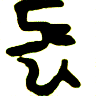

In [19]:
out_image

In [ ]:
from PIL import Image
Image.open(args.content_image_path).convert('RGB')
Image.open(args.style_image_path).convert('RGB')